## Problem Statement
Website traffic is a critical metric for any online business, as it directly impacts revenue and growth. However, accurately forecasting website traffic can be challenging due to a variety of factors such as seasonality, promotions, and changes in consumer behavior.

As a result, many businesses struggle to effectively plan for website traffic and allocate resources appropriately. This can lead to under-utilized resources, missed opportunities, and decreased revenue.

The problem of accurately forecasting website traffic is compounded by the growing number of channels and devices through which consumers access websites, making it even more difficult to accurately predict website traffic.

The objective of this project is to develop a robust and accurate model for forecasting website traffic. This model should be able to account for various factors that influence website traffic, including seasonality, promotions, and changes in consumer behavior. The model should also be able to account for the impact of different channels and devices on website traffic.

The solution should provide a reliable and accurate forecast of website traffic, enabling businesses to make informed decisions about resource allocation, promotions, and other initiatives aimed at driving traffic to their websites. This will ultimately help businesses increase revenue and drive growth.

## Data
The dataset I am using for Website Traffic Forecasting is collected from the daily traffic data of thecleverprogrammer.com. It contains data about daily traffic data from June 2021 to June 2022. You can download the dataset from here:https://statso.io/forecasting-website-traffic-case-study/

## Importing the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

## Loading the dataset

In [15]:
data = pd.read_csv("/content/drive/MyDrive/filename/Thecleverprogrammer.csv")
print(data.head())

         Date  Views
0  01/06/2021   7831
1  02/06/2021   7798
2  03/06/2021   7401
3  04/06/2021   7054
4  05/06/2021   7973


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    391 non-null    object
 1   Views   391 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 6.2+ KB


The dataset contains two columns, date and traffic. Before moving forward, I will convert the Date column into Datetime data type:

In [3]:
data["Date"] = pd.to_datetime(data["Date"], 
                              format="%d/%m/%Y")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    391 non-null    datetime64[ns]
 1   Views   391 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.2 KB
None


The Date time column was an object initially, so I converted it into a Datetime column. Now let’s have a look at the daily traffic of the website:

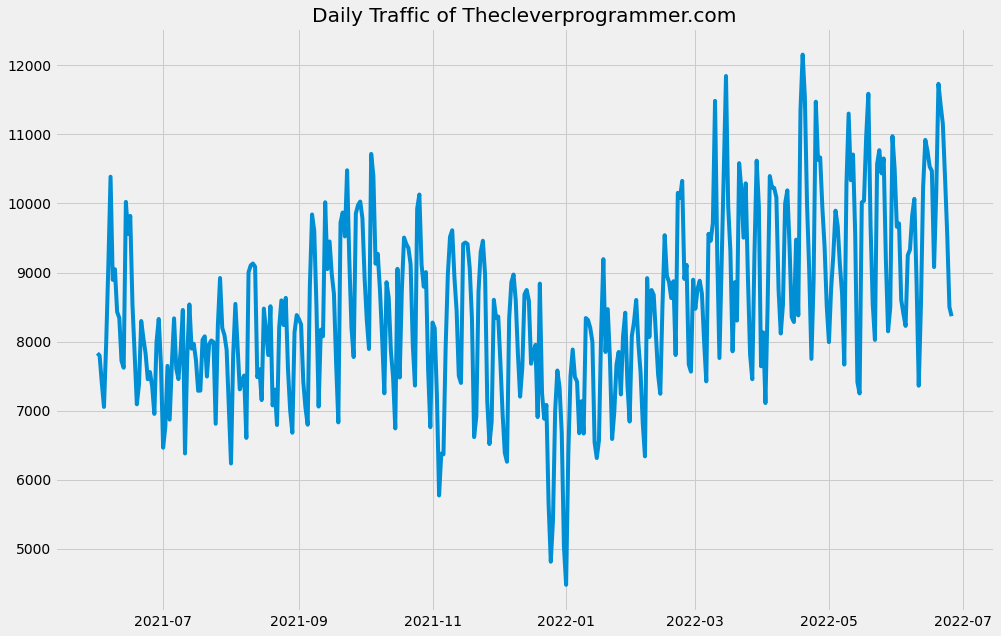

In [4]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.plot(data["Date"], data["Views"])
plt.title("Daily Traffic of Thecleverprogrammer.com")
plt.show()

Our website traffic data is seasonal because the traffic on the website increases during the weekdays and decreases during the weekends. It is valuable to know if the dataset is seasonal or not while working on our problem of Time Series Forecasting. Here is  how we can have a look at whether our dataset is stationary or seasonal

<Figure size 432x288 with 0 Axes>

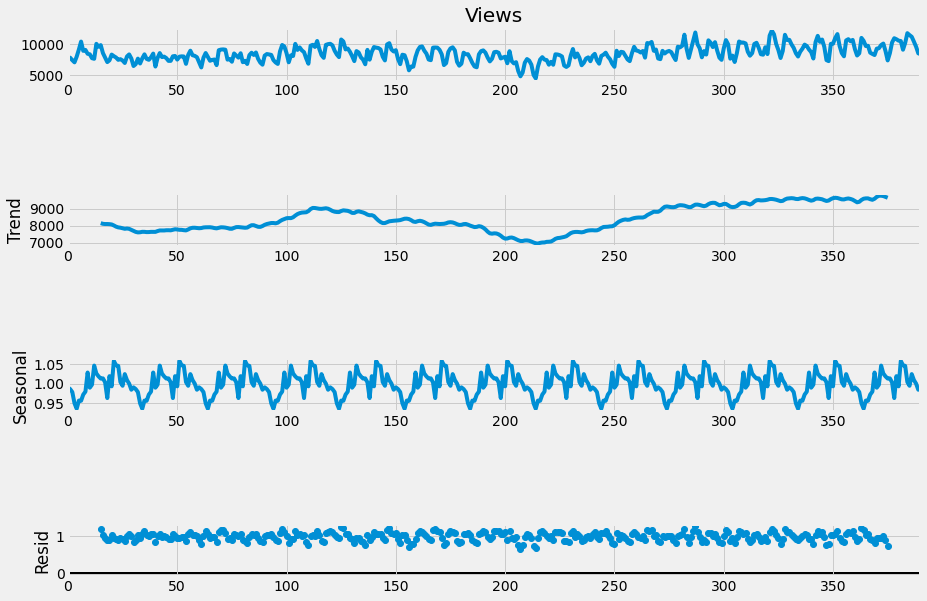

In [7]:
result = seasonal_decompose(data["Views"], 
                            model='multiplicative', 
                            period = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 10);

I will be using the Seasonal ARIMA (SARIMA) model to forecast traffic on the website. Before using the SARIMA model, it is necessary to find the p, d, and q values. You can learn how to find p, d, and q values from here:https://thecleverprogrammer.com/2022/06/21/time-series-forecasting-with-arima/

As the data is not stationary, the value of d is 1. To find the values of p and q, we can use the autocorrelation and partial autocorrelation plots:

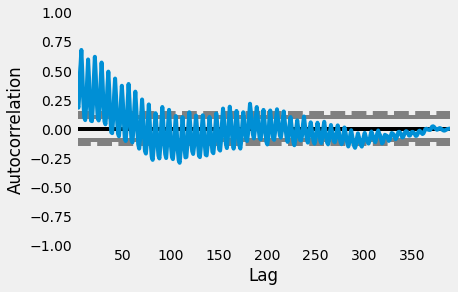

In [9]:
pd.plotting.autocorrelation_plot(data["Views"]);

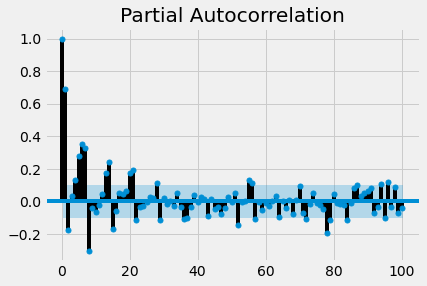

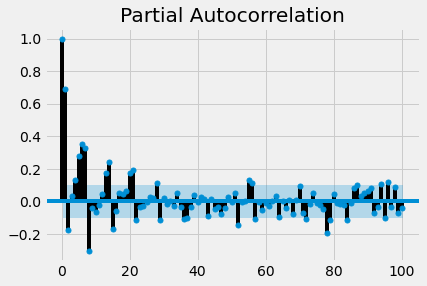

In [10]:
plot_pacf(data["Views"], lags = 100)

Now here’s how we can train a SARIMA model for the task of website traffic forecasting:

In [11]:
p, d, q = 5, 1, 2
model=sm.tsa.statespace.SARIMAX(data['Views'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Views   No. Observations:                  391
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood               -3099.396
Date:                            Sun, 05 Feb 2023   AIC                           6228.791
Time:                                    19:23:46   BIC                           6287.815
Sample:                                         0   HQIC                          6252.217
                                            - 391                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7852      0.132      5.932      0.000       0.526       1.045
ar.L2         -0.7880      0.135   

Now let’s forecast traffic on the website for the next 100 days:

In [12]:
predictions = model.predict(len(data), len(data)+100)
print(predictions)

391     9860.127528
392    10775.106240
393    10764.201016
394     9862.038057
395     8753.270861
           ...     
487     9530.000418
488     9779.731231
489    10635.292732
490    11019.910933
491    10998.635442
Name: predicted_mean, Length: 101, dtype: float64


Here’s how we can plot the predictions so that we can have some visualization

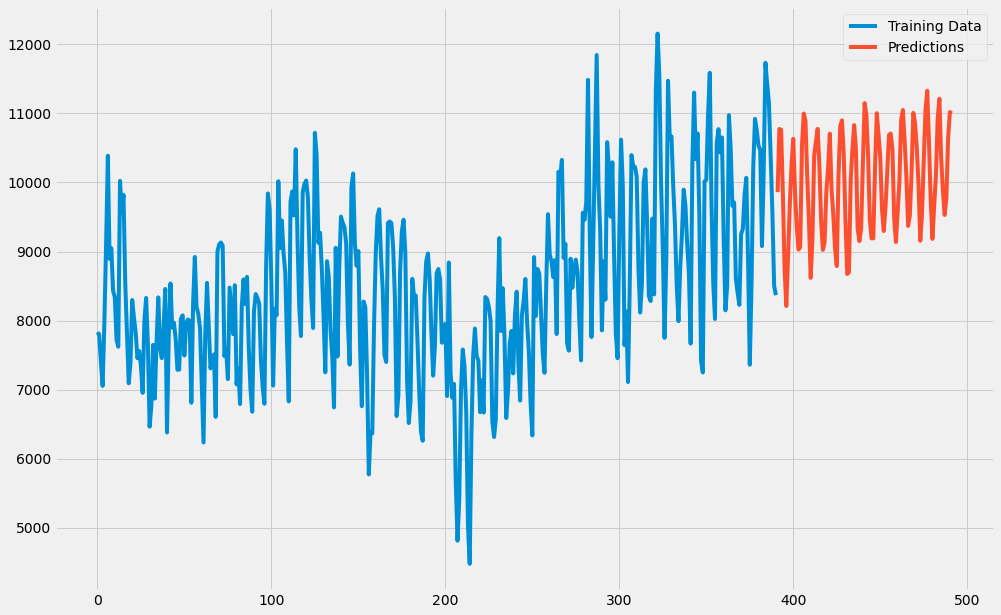

In [14]:
data["Views"].plot(legend=True, label="Training Data", 
                   figsize=(15, 10))
predictions.plot(legend=True, label="Predictions");

## Conclusion
In conclusion, website traffic forecasting is a crucial aspect of any online business, as it helps businesses plan for resource allocation, promotions, and other initiatives aimed at driving traffic to their websites. With a robust and accurate model, businesses can make informed decisions based on a reliable and accurate forecast of website traffic. This will help them increase revenue and drive growth, making website traffic forecasting a valuable tool for the success of any online business.